# 什麼是季節性？ #

只要序列的平均值有規律的、週期性的變化，我們就說時間序列表現出**季節性**。 季節性變化通常遵循時鐘和日曆 —— 一天、一周或一年的重複很常見。 季節性通常是由自然世界在幾天和幾年內的循環或圍繞日期和時間的社會行為慣例驅動的。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/ViYbSxS.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>四個時間序列中的季節性模式。
</center></figcaption>
</figure>

我們將學習兩種模擬季節性的特徵。 第一種，**指標(indicators)**，最適合**觀察很少的季節**，例如每週季節觀察。 第二種，**傅里葉特徵(Fourier features)**，最適合**有很多觀測(observations)的季節**，比如每年的日常觀測季節。

# 季節性圖和季節性指標 #

就像我們使用移動平均線圖來發現系列中的趨勢一樣，我們可以使用**季節性圖(seasonal plot)**來發現季節性模式。

季節性圖顯示了針對某個常見時期繪製的時間序列片段，該時期是我們要觀察的“季節”。 該圖顯示了 Wikipedia 關於 *Trigonometry* 的文章的每日瀏覽量的季節性圖：文章的每日瀏覽量是在一個常見的 *每週* 時間段內繪製的。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/bd7D4NJ.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>該系列有明顯的每周季節性模式，工作日較高，週末下降。
</center></figcaption>
</figure>

### 季節性指標

**季節性指標**是**表示時間序列水平的季節性差異的二元特徵**。 如果我們將季節性時段視為分類特徵並應用單熱編碼(one-hot encoding)，則可以得到季節性指標。

通過一周中的一個熱編碼天，我們得到每週的季節性指標。 為 *Trigonometry* 系列創建每週指標將為我們提供六個新的“虛擬”特徵。 （如果你放棄其中一個指標，線性回歸效果最好；我們在下圖中選擇了星期一。）

| Date       | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
|------------|---------|-----------|----------|--------|----------|--------|
| 2016-01-04 | 0.0     | 0.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-05 | 1.0     | 0.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-06 | 0.0     | 1.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-07 | 0.0     | 0.0       | 1.0      | 0.0    | 0.0      | 0.0    |
| 2016-01-08 | 0.0     | 0.0       | 0.0      | 1.0    | 0.0      | 0.0    |
| 2016-01-09 | 0.0     | 0.0       | 0.0      | 0.0    | 1.0      | 0.0    |
| 2016-01-10 | 0.0     | 0.0       | 0.0      | 0.0    | 0.0      | 1.0    |
| 2016-01-11 | 0.0     | 0.0       | 0.0      | 0.0    | 0.0      | 0.0    |
| ...        | ...     | ...       | ...      | ...    | ...      | ...    |

向訓練數據中添加**季節性指標**有助於模型區分季節性週期內的平均值：

<figure style="padding: 1em;">
<img src="https://i.imgur.com/hIlF5j5.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>普通線性迴歸學習季節中每個時間的平均值。</center></figcaption>
</figure>

指標充當On / Off開關。 在任何時候，這些指標中最多有一個的值為“1”（*開*）。 線性迴歸學習 `Mon` 的基線值 `2379`，然後根據當天 *On* 的任何指標的值進行調整； 其餘的為“0”並消失。

#傅里葉特徵和周期圖#

我們現在討論的這種特徵更適合長季節，而不是指標不切實際的許多觀察。 **傅立葉特徵不是為每個日期創建一個特徵，而是嘗試用幾個特徵來捕捉季節性曲線的整體形狀。**

讓我們看一下 *Trigonometry* 中的年度季節圖。 注意各種頻率的重複：每年 3 次長的上下運動，每年 52 次的短週運動，也許還有其他。(一條時間曲線有多個不同單位的週期)

<figure style="padding: 1em;">
<img src="https://i.imgur.com/NJcaEdI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>以年為季的<em>Wiki Trigonometry</em> 序列.</center></figcaption>
</figure>

我們試圖用傅里葉特徵捕捉一個季節內的這些頻率。 這個想法是在我們的訓練數據中包含與我們試圖建模的季節具有相同頻率的周期性曲線。 我們使用的曲線是三角函數正弦(sin)和餘弦(cos)的曲線。

**傅里葉特徵**是一對正弦和余弦曲線，從最長的季節開始，每個潛在頻率對應一對。 模擬年度季節性的傅里葉對將具有頻率：每年一次、每年兩次、每年三次，等等。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/bKOjdU7.png" width=600, alt="A top figure and a bottom figure, each showing a sine curve and a cosine curve. The curves in the top plot both have frequency of once per year, while the curves in the bottom plot both have a frequency of twice per year.">
<figcaption style="textalign: center; font-style: italic"><center>年度季節性的前兩個傅立葉對。 <strong>上: </strong>頻率每年一次。 <strong>下: </strong>頻率每年兩次。</strong></center></figcaption>
</figure>

如果我們將一組這些正弦/餘弦曲線添加到我們的訓練數據中，線性迴歸算法將計算出適合目標序列中季節性分量的權重。 該圖說明了線性迴歸如何使用四個傅立葉對來模擬 *Wiki Trigonometry* 系列中的年度季節性。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mijPhko.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>上: </strong>四個傅立葉對的曲線，正弦和餘弦的總和以及迴歸係數。 每條曲線模擬不同的頻率。 <strong>下: </strong>這些曲線的總和近似於季節性模式。</center></figcaption>
</figure>

請注意，我們只需要八個特徵（四個：正弦/餘弦對）就可以很好地估計年度季節性。 將此與需要數百個特徵（一年中的每一天一個）的季節性指標方法進行比較。 通過僅使用傅立葉特徵對季節性的“主效應(main effect)”進行建模，您通常需要向訓練數據中添加更少的特徵，這意味著**減少了計算時間並降低了過度擬合的風險**。

### 使用周期圖選擇傅里葉特徵

我們應該在特徵集中實際包含多少傅里葉對？ 我們可以用周期圖來回答這個問題。 **週期圖**告訴您時間序列中頻率的強度。 具體來說，圖的 y 軸上的值為 `(a ** 2 + b ** 2) / 2`，其中 `a` 和 `b` 是該頻率下正弦和餘弦的係數（如 在上面的 *Fourier Components* 圖中）。

<figure style="padding: 1em;">
<img src="https://i.imgur.com/PK6WEe3.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center><em>Wiki Trigonometry</em> 的序列週期圖</center></figcaption>
</figure>

從左到右，週期圖在 *Quarterly* 之後下降，一年四次。 這就是我們選擇四對傅立葉對來模擬年度季節的原因。 我們忽略了*每週*頻率，因為它可以更好地使用指標建模。

### 計算傅里葉特徵（可選）

了解傅里葉特徵的計算方式對於使用它們並不是必不可少的，但如果看到細節可以澄清事情，下面的單元格隱藏單元說明瞭如何從時間序列的索引中導出一組傅里葉特徵。 （不過，我們將在我們的應用程序中使用來自 `statsmodels` 的庫函數。）

In [1]:

import numpy as np


def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)


# 計算序列 y 的 4對傅立葉特徵（8 個新特徵），具有每日觀測值和年度季節性：
# fourier_features(y, freq=365.25, order=4)

# Example - Tunnel Traffic #

We'll continue once more with the *Tunnel Traffic* dataset. This hidden cell loads the data and defines two functions: `seasonal_plot` and `plot_periodogram`.

In [4]:

from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


data_dir = Path("./data_set/")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")
tunnel

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


<AxesSubplot:xlabel='Day'>

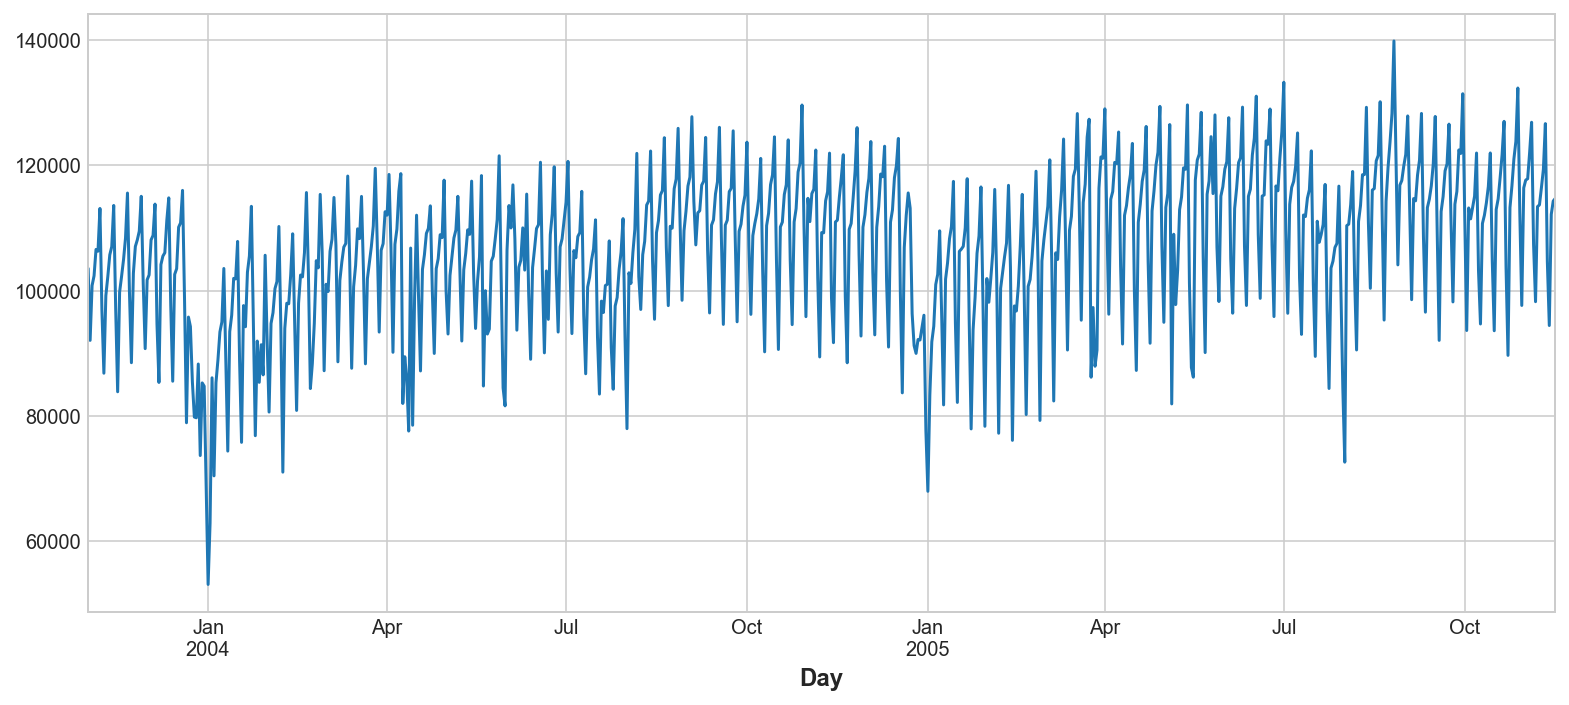

In [7]:
tunnel['NumVehicles'].plot.line()

讓我們來看看一周和一年多的季性圖。

In [8]:
X

,NumVehicles,day,week,dayofyear,year
Day,,,,,
2003-11-01,103536,5,44,305,2003
2003-11-02,92051,6,44,306,2003
2003-11-03,100795,0,45,307,2003
2003-11-04,102352,1,45,308,2003
2003-11-05,106569,2,45,309,2003
...,...,...,...,...,...
2005-11-12,104646,5,45,316,2005
2005-11-13,94424,6,45,317,2005
2005-11-14,112165,0,46,318,2005


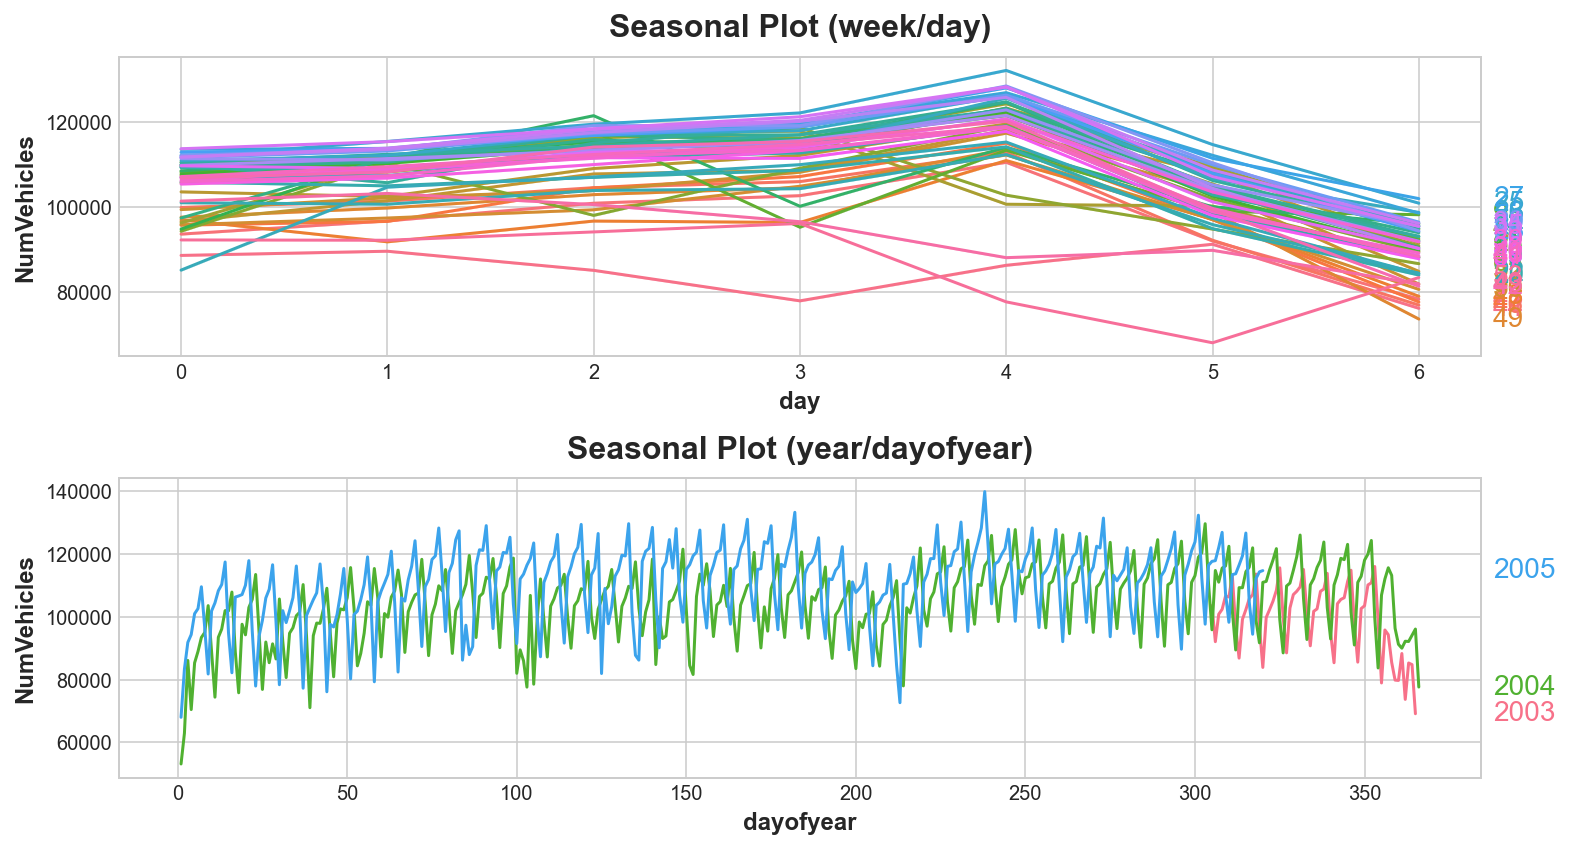

In [5]:
X = tunnel.copy()

# 一周內的幾天
X["day"] = X.index.dayofweek  # x軸 (freq)
X["week"] = X.index.week  # 季度 (period)

# 一年內的幾天
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

現在讓我們看一下週期圖：

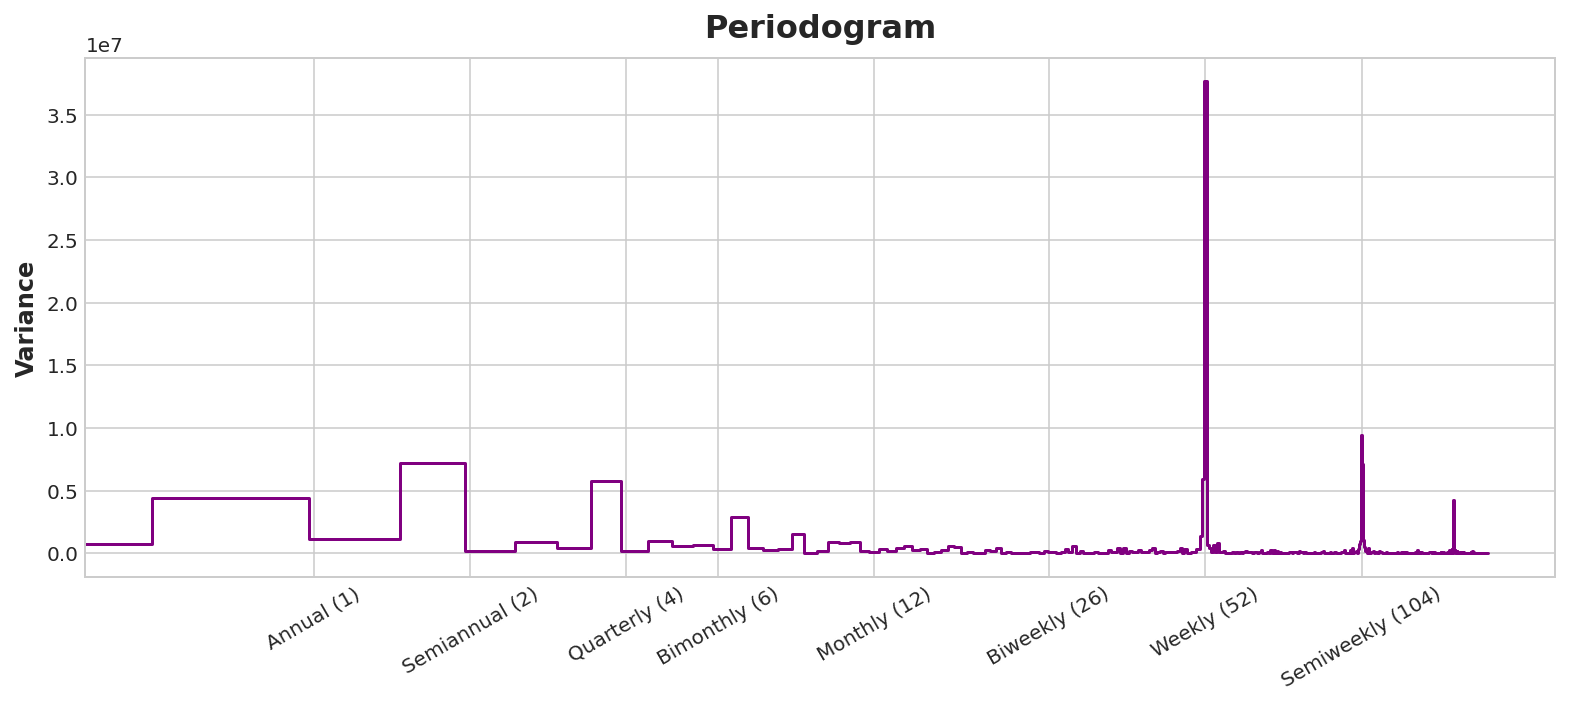

In [4]:
plot_periodogram(tunnel.NumVehicles);

週期圖與上面的季節圖一致：強勁的每周季性和較弱的年度季性。 我們將用指標建模每周季性，用傅里葉特徵建模每年季節。 從右到左，週期圖在 *Bimonthly (6)* 和 *Monthly (12)* 之間下降，所以讓我們使用 10 個傅立葉對。

我們將使用`DeterministicProcess`創建我們的季節性特徵，這是我們在第 2 課中用於創建趨勢特徵的相同實用程序。 要使用兩個季節性時段（每周和每年），我們需要將其中一個實例化為“附加項(additional term)”：

In [9]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)  # “年度(A)季節性”的 10 個 sin/cos 對, month(M)

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,               # 誤差的虛擬特徵 (y-intercept)
    order=1,                     # 趨勢 (order 1 means linear)
    seasonal=True,               # 週季度性 (indicators)
    additional_terms=[fourier],  # 年季度性 (fourier)
    drop=True,                   # 刪除項以避免共線性
)

X = dp.in_sample()  # 在 tunnel.index 中為日期創建特徵

In [11]:
X

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)",...,"sin(6,freq=A-DEC)","cos(6,freq=A-DEC)","sin(7,freq=A-DEC)","cos(7,freq=A-DEC)","sin(8,freq=A-DEC)","cos(8,freq=A-DEC)","sin(9,freq=A-DEC)","cos(9,freq=A-DEC)","sin(10,freq=A-DEC)","cos(10,freq=A-DEC)"
Day,,,,,,,,,,,,,,,,,,,,,
2003-11-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.867456,0.497513,...,-0.017213,0.999852,-0.875892,0.482508,-0.854322,-0.519744,0.025818,-0.999667,0.880012,-0.474951
2003-11-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.858764,0.512371,...,0.085965,0.996298,-0.811539,0.584298,-0.917584,-0.397543,-0.128748,-0.991677,0.785650,-0.618671
2003-11-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.849817,0.527078,...,0.188227,0.982126,-0.735417,0.677615,-0.963471,-0.267814,-0.280231,-0.959933,0.668064,-0.744104
2003-11-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.840618,0.541628,...,0.288482,0.957485,-0.648630,0.761104,-0.991114,-0.133015,-0.425000,-0.905193,0.530730,-0.847541
2003-11-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.831171,0.556017,...,0.385663,0.922640,-0.552435,0.833556,-0.999991,0.004304,-0.559589,-0.828770,0.377708,-0.925925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-11-12,1.0,743.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.758306,0.651899,...,0.899631,0.436651,0.255353,0.966848,-0.566702,0.823923,-0.994218,0.107381,-0.729558,-0.683919
2005-11-13,1.0,744.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.746972,0.664855,...,0.939856,0.341571,0.369725,0.929141,-0.448229,0.893919,-0.965740,0.259512,-0.835925,-0.548843
2005-11-14,1.0,745.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.735417,0.677615,...,0.970064,0.242850,0.478734,0.877960,-0.321270,0.946988,-0.914128,0.405426,-0.917584,-0.397543


創建特徵集後，我們就可以擬合模型並進行預測了。 我們將添加一個 90 天的預測，以了解我們的模型如何在訓練數據之外進行推斷。 這裡的代碼與前面課程中的代碼相同。

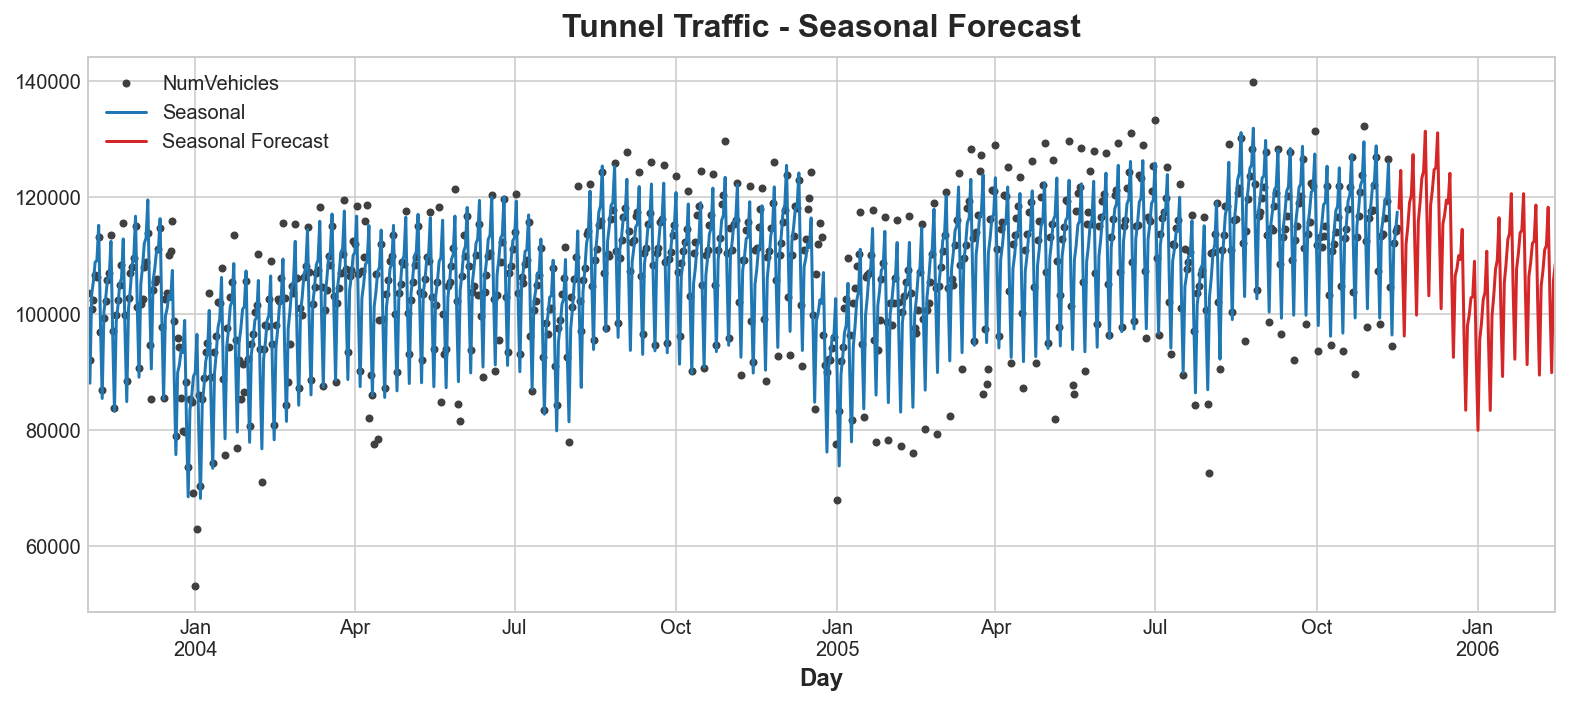

In [12]:

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

---

我們還可以用時間序列做更多的事情來改進我們的預測。 在下一課中，我們將學習如何將時間序列本身用作特徵。 使用時間序列作為預測的輸入，我們可以對序列中經常出現的另一個組件進行建模：*循環(cycles)*。

# EXERCISE #

[**Create seasonal features for Store Sales**](https://www.kaggle.com/kernels/fork/19615991) and extend these techniques to capturing holiday effects.